<a href="https://colab.research.google.com/github/chandini2595/Projects_Using_KDD_SEMMA_CRISP_DM/blob/main/Customer_Churn_Prediction_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

# Number of samples (rows)
n_samples = 1000

# Setting random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for each column
CustomerID = np.arange(1, n_samples + 1)
Region = np.random.choice(['North', 'South', 'East', 'West'], n_samples)
CustomerType = np.random.choice(['Wholesale', 'Retail', 'Distributor'], n_samples)
ContractLength = np.random.randint(1, 36, n_samples)  # Contract in months
MonthlyPurchaseVolume = np.random.normal(5000, 1500, n_samples)  # Volume in barrels
DiscountsProvided = np.random.choice([0, 1], n_samples)
CustomerComplaints = np.random.randint(0, 10, n_samples)

# Generate target variable 'Churn' with a slight bias towards not churning
Churn = np.random.choice([0, 1], p=[0.7, 0.3], size=n_samples)

# Create a DataFrame
churn_data = pd.DataFrame({
    'CustomerID': CustomerID,
    'Region': Region,
    'CustomerType': CustomerType,
    'ContractLength': ContractLength,
    'MonthlyPurchaseVolume': MonthlyPurchaseVolume,
    'DiscountsProvided': DiscountsProvided,
    'CustomerComplaints': CustomerComplaints,
    'Churn': Churn
})

print(churn_data.head())


   CustomerID Region CustomerType  ContractLength  MonthlyPurchaseVolume  \
0           1   East       Retail              28            4835.676063   
1           2   West  Distributor               5            4093.981588   
2           3  North    Wholesale              13            6326.910185   
3           4   East    Wholesale              17            3621.229792   
4           5   East    Wholesale              32            3334.400724   

   DiscountsProvided  CustomerComplaints  Churn  
0                  0                   6      1  
1                  1                   9      0  
2                  1                   7      1  
3                  0                   5      0  
4                  0                   9      0  


In [4]:
print(churn_data.isnull().sum())

CustomerID               0
Region                   0
CustomerType             0
ContractLength           0
MonthlyPurchaseVolume    0
DiscountsProvided        0
CustomerComplaints       0
Churn                    0
dtype: int64


In [8]:
churn_data.fillna({
    'ContractLength': churn_data['ContractLength'].median(),
    'MonthlyPurchaseVolume': churn_data['MonthlyPurchaseVolume'].median(),
    'Region': churn_data['Region'].mode()[0],
    'CustomerType': churn_data['CustomerType'].mode()[0],
    'DiscountsProvided': churn_data['DiscountsProvided'].mode()[0],
    'CustomerComplaints': churn_data['CustomerComplaints'].median()
}, inplace=True)

In [11]:
# One-hot encoding for Region and CustomerType
churn_data_encoded = pd.get_dummies(churn_data, columns=['Region', 'CustomerType'], drop_first=True)

# Display the encoded dataset
print(churn_data_encoded.head())

   CustomerID  ContractLength  MonthlyPurchaseVolume  DiscountsProvided  \
0           1              28            4835.676063                  0   
1           2               5            4093.981588                  1   
2           3              13            6326.910185                  1   
3           4              17            3621.229792                  0   
4           5              32            3334.400724                  0   

   CustomerComplaints  Churn  Region_North  Region_South  Region_West  \
0                   6      1         False         False        False   
1                   9      0         False         False         True   
2                   7      1          True         False        False   
3                   5      0         False         False        False   
4                   9      0         False         False        False   

   CustomerType_Retail  CustomerType_Wholesale  
0                 True                   False  
1           

In [13]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_cols = ['ContractLength', 'MonthlyPurchaseVolume', 'CustomerComplaints']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
churn_data_encoded[numerical_cols] = scaler.fit_transform(churn_data_encoded[numerical_cols])

print(churn_data_encoded.head())

   CustomerID  ContractLength  MonthlyPurchaseVolume  DiscountsProvided  \
0           1        0.983055              -0.088350                  0   
1           2       -1.314736              -0.588406                  1   
2           3       -0.515504               0.917051                  1   
3           4       -0.115889              -0.907138                  0   
4           5        1.382671              -1.100521                  0   

   CustomerComplaints  Churn  Region_North  Region_South  Region_West  \
0            0.485579      1         False         False        False   
1            1.545023      0         False         False         True   
2            0.838727      1          True         False        False   
3            0.132431      0         False         False        False   
4            1.545023      0         False         False        False   

   CustomerType_Retail  CustomerType_Wholesale  
0                 True                   False  
1           

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = churn_data_encoded.drop('Churn', axis=1)
y = churn_data_encoded['Churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (800, 10)
Testing data shape: (200, 10)


In [15]:
# Create a new feature: Average Purchase Volume per Contract Month
churn_data_encoded['AvgPurchasePerMonth'] = churn_data_encoded['MonthlyPurchaseVolume'] / (churn_data_encoded['ContractLength'] + 1)

# Display the dataset with the new feature
print(churn_data_encoded.head())


   CustomerID  ContractLength  MonthlyPurchaseVolume  DiscountsProvided  \
0           1        0.983055              -0.088350                  0   
1           2       -1.314736              -0.588406                  1   
2           3       -0.515504               0.917051                  1   
3           4       -0.115889              -0.907138                  0   
4           5        1.382671              -1.100521                  0   

   CustomerComplaints  Churn  Region_North  Region_South  Region_West  \
0            0.485579      1         False         False        False   
1            1.545023      0         False         False         True   
2            0.838727      1          True         False        False   
3            0.132431      0         False         False        False   
4            1.545023      0         False         False        False   

   CustomerType_Retail  CustomerType_Wholesale  AvgPurchasePerMonth  
0                 True                  

In [16]:
# Binning MonthlyPurchaseVolume into Low, Medium, and High
churn_data_encoded['PurchaseVolumeCategory'] = pd.cut(churn_data_encoded['MonthlyPurchaseVolume'], bins=[0, 3000, 6000, np.inf], labels=['Low', 'Medium', 'High'])

# Display the dataset with the new binned feature
print(churn_data_encoded[['MonthlyPurchaseVolume', 'PurchaseVolumeCategory']].head())


   MonthlyPurchaseVolume PurchaseVolumeCategory
0              -0.088350                    NaN
1              -0.588406                    NaN
2               0.917051                    Low
3              -0.907138                    NaN
4              -1.100521                    NaN


In [18]:
# First, check if there are any remaining non-numeric columns
print(churn_data_encoded.dtypes)

# Drop non-numeric columns (like 'PurchaseVolumeCategory') before applying PCA
churn_data_for_pca = churn_data_encoded.drop(columns=['PurchaseVolumeCategory'], errors='ignore')

# Verify if all columns are numeric
print(churn_data_for_pca.dtypes)

# Apply PCA to the numeric data (excluding the target 'Churn')
X_pca = pca.fit_transform(churn_data_for_pca.drop('Churn', axis=1))

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Display the first few rows of the PCA-transformed data
print(pca_df.head())

CustomerID                   int64
ContractLength             float64
MonthlyPurchaseVolume      float64
DiscountsProvided            int64
CustomerComplaints         float64
Churn                        int64
Region_North                  bool
Region_South                  bool
Region_West                   bool
CustomerType_Retail           bool
CustomerType_Wholesale        bool
AvgPurchasePerMonth        float64
PurchaseVolumeCategory    category
dtype: object
CustomerID                  int64
ContractLength            float64
MonthlyPurchaseVolume     float64
DiscountsProvided           int64
CustomerComplaints        float64
Churn                       int64
Region_North                 bool
Region_South                 bool
Region_West                  bool
CustomerType_Retail          bool
CustomerType_Wholesale       bool
AvgPurchasePerMonth       float64
dtype: object
         PCA1      PCA2
0 -499.500061 -0.313795
1 -498.499771  1.601405
2 -497.499855  1.611708
3 -496.499977

In [20]:
# Drop the PurchaseVolumeCategory column as it's causing issues and might not be necessary for the model
churn_data_encoded = churn_data_encoded.drop(columns=['PurchaseVolumeCategory'], errors='ignore')

# Proceed with model training

In [22]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Separate features and target
X = churn_data_encoded.drop('Churn', axis=1)
y = churn_data_encoded['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train and evaluate Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logistic))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(f"ROC AUC: {roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])}")

# Train and evaluate Random Forest
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"ROC AUC: {roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])}")

# Train and evaluate XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200

Accuracy: 0.725
ROC AUC: 0.49918495297805643

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       145
           1       0.20      0.04      0.06        55

    accuracy                           0.69       200
   macro avg       0.46      0.49      0.44       200
weighted avg       0.58      0.69      0.61       200

Accuracy: 0.695
ROC AUC: 0.49078369905956115

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       145
           1       0.30      0.22      0.25        55

    accur

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:48:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best model and evaluate
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best_rf))
print(f"Best ROC AUC: {roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])}")

Best Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       145
           1       0.38      0.05      0.10        55

    accuracy                           0.71       200
   macro avg       0.55      0.51      0.46       200
weighted avg       0.63      0.71      0.63       200

Best ROC AUC: 0.4834482758620689


In [24]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Predict on the test set using the trained model (e.g., Random Forest)
y_pred_rf = random_forest_model.predict(X_test)

# Generate the classification report
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{conf_matrix}")

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       145
           1       0.20      0.04      0.06        55

    accuracy                           0.69       200
   macro avg       0.46      0.49      0.44       200
weighted avg       0.58      0.69      0.61       200

Accuracy: 0.695
ROC AUC Score: 0.49078369905956115
Confusion Matrix:
[[137   8]
 [ 53   2]]


                   Feature  Importance
0               CustomerID    0.210323
10     AvgPurchasePerMonth    0.201487
2    MonthlyPurchaseVolume    0.192462
1           ContractLength    0.146475
4       CustomerComplaints    0.109346
3        DiscountsProvided    0.026713
8      CustomerType_Retail    0.024682
9   CustomerType_Wholesale    0.024389
6             Region_South    0.022441
7              Region_West    0.021953
5             Region_North    0.019728


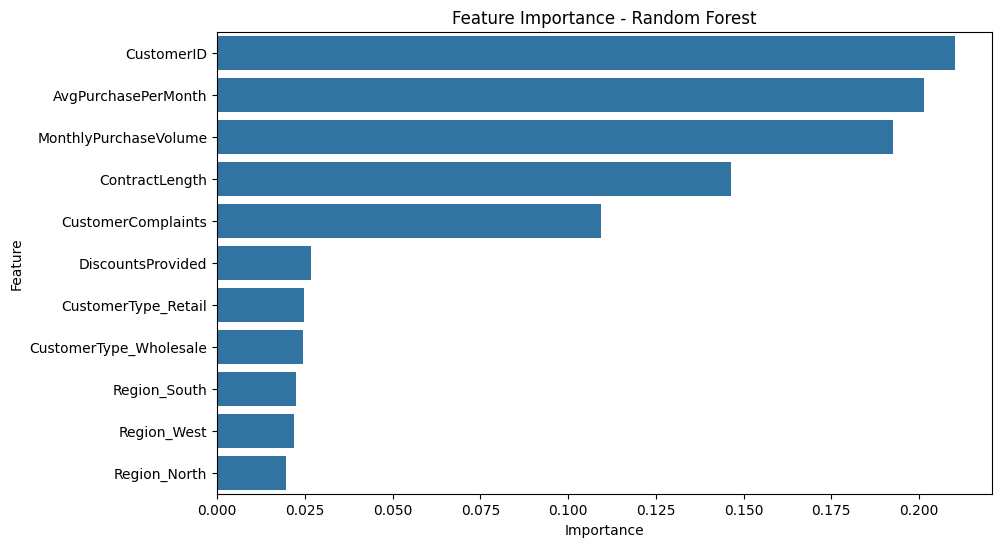

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate feature importances
importances = random_forest_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model with optimal hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
print("Best Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best_rf))
print(f"Best ROC AUC: {roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       145
           1       0.22      0.07      0.11        55

    accuracy                           0.68       200
   macro avg       0.47      0.49      0.46       200
weighted avg       0.58      0.68      0.61       200

Best ROC AUC: 0.5136050156739812


In [29]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                               param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)
print("Best XGBoost Model Performance:")
print(classification_report(y_test, y_pred_best_xgb))
print(f"Best ROC AUC: {roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       145
           1       0.30      0.20      0.24        55

    accuracy                           0.65       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.61      0.65      0.63       200

Best ROC AUC: 0.46796238244514105


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:59:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='roc_auc')

# Display cross-validation results
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean()}")

Cross-Validation ROC AUC Scores: [0.56127273 0.43281818 0.5        0.53063636 0.50468836]
Mean ROC AUC Score: 0.5058831269116983


In [31]:
import joblib

# Save the best model to a file
joblib.dump(best_rf_model, 'customer_churn_model.pkl')

# To load the model later:
loaded_model = joblib.load('customer_churn_model.pkl')

# Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)

In [37]:
import pandas as pd

# Define the new record to match the expected feature names
new_record = {
    "CustomerID": 12345,  # Replace with actual ID or use placeholder
    "ContractLength": 12,
    "MonthlyPurchaseVolume": 5000,
    "DiscountsProvided": 1,
    "CustomerComplaints": 2,
    "Region_North": 1,  # One-hot encoded value, e.g., North = 1, others = 0
    "Region_South": 0,
    "Region_West": 0,
    "CustomerType_Retail": 1,  # One-hot encoded value, Retail = 1, Wholesale = 0
    "CustomerType_Wholesale": 0,
    "AvgPurchasePerMonth": 416.67  # Adjust this based on actual calculation
}

# Convert the dictionary into a DataFrame
new_record_df = pd.DataFrame([new_record])

# Display the DataFrame (optional)
print(new_record_df)

   CustomerID  ContractLength  MonthlyPurchaseVolume  DiscountsProvided  \
0       12345              12                   5000                  1   

   CustomerComplaints  Region_North  Region_South  Region_West  \
0                   2             1             0            0   

   CustomerType_Retail  CustomerType_Wholesale  AvgPurchasePerMonth  
0                    1                       0               416.67  


In [38]:
prediction = model.predict(new_record_df)

# Print the result: 1 for churn, 0 for no churn
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")

# Optionally, print the probability of churn
probabilities = model.predict_proba(new_record_df)
print(f"Probability of No Churn: {probabilities[0][0]}")
print(f"Probability of Churn: {probabilities[0][1]}")

Prediction: No Churn
Probability of No Churn: 0.58
Probability of Churn: 0.42
